## Intensity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import proplot as pplt
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
origin = np.load("../probe_wf.npy")
origin_int = np.abs(origin)**2; origin_int /= origin_int.max()
origin_phs = np.angle(origin)
GEM = np.load(r'task_SimpleSimScikit_ePIE_padding_1\final_probe_rot.npy')
GEM_int = np.abs(GEM)**2; GEM_int /= GEM_int.max()
GEM_phs = np.angle(GEM)
DM = np.load(r'task_SimpleSimScikit_PtyPy_DM_padding_1_full_support\final_probe_rot_0100.npy')
DM_int = np.abs(DM)**2; DM_int /= DM_int.max()
DM_phs = np.angle(DM)
EPIE = np.load(r'task_SimpleSimScikit_PtyPy_EPIE_200_padding_1\final_probe_rot_0200.npy')
EPIE_int = np.abs(EPIE)**2; EPIE_int /= EPIE_int.max()
EPIE_phs = np.angle(EPIE)

In [3]:
origin.shape

(128, 128)

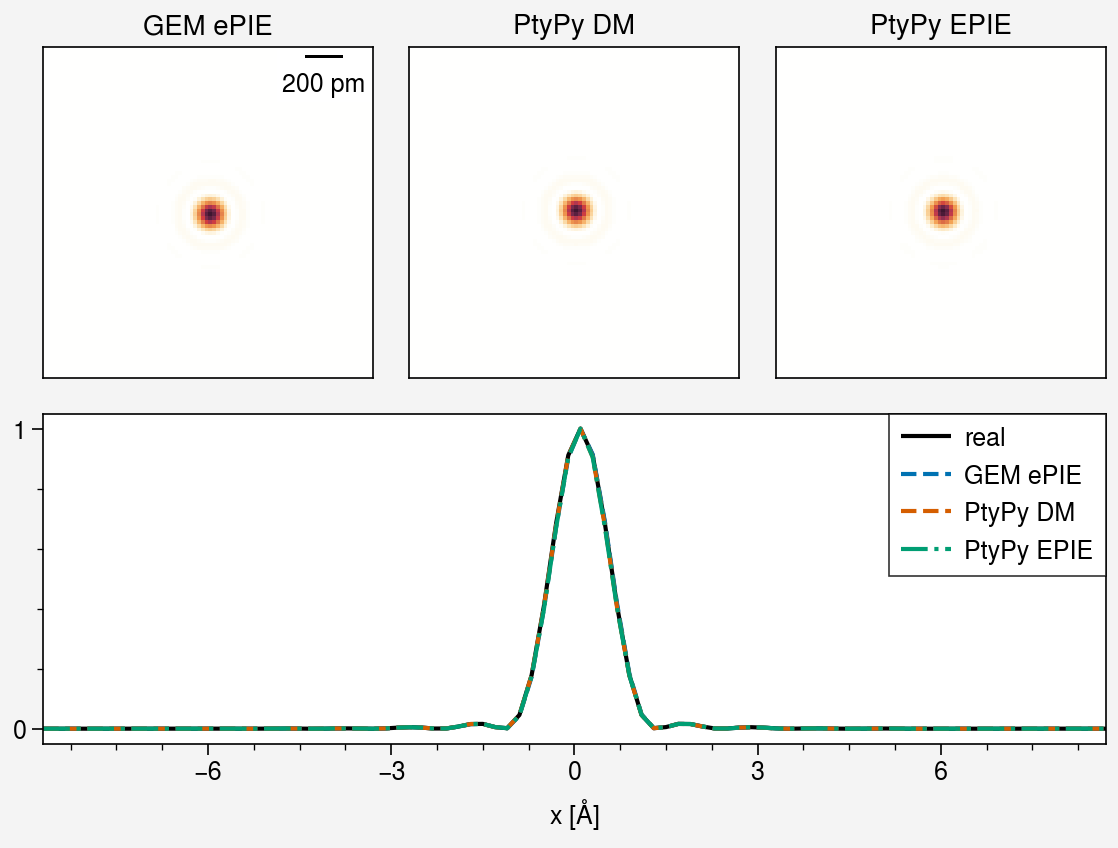

In [4]:
fig, (ax1, ax2, ax3, axpf) = pplt.subplots(
    figwidth="14.2cm",
    xticks=[], yticks=[],
    array=[[1, 2, 3], [4, 4, 4]],
    share=False)
X = np.arange(GEM_int.shape[1]) * 0.19998036801729185 # angstrom
X -= X.mean()

margin = 4 # angstrom
ax1.imshow(GEM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax1.add_artist(ScaleBar(0.1, 'nm', location='upper right'))
ax2.imshow(DM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax3.imshow(EPIE_int, extent=[X[0], X[-1], X[0], X[-1]])

ax1.format(title='GEM ePIE')
ax1.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax2.format(title='PtyPy DM')
ax2.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax3.format(title='PtyPy EPIE')
ax3.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))

axpf.plot(X, origin_int[origin_int.shape[0]//2], label='real', linestyle='-', color='black')
axpf.plot(X, GEM_int[GEM_int.shape[0]//2], label='GEM ePIE', linestyle='--')
axpf.plot(X, DM_int[DM_int.shape[0]//2-1], label='PtyPy DM', linestyle='--')
axpf.plot(X, EPIE_int[EPIE_int.shape[0]//2-1], label='PtyPy EPIE', linestyle='-.')
axpf.legend(ncols=1, loc='upper right')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), xticks=3, yticks=1, xlabel='x [$\AA$]')

plt.savefig('probe_comparison.pdf', dpi=300)

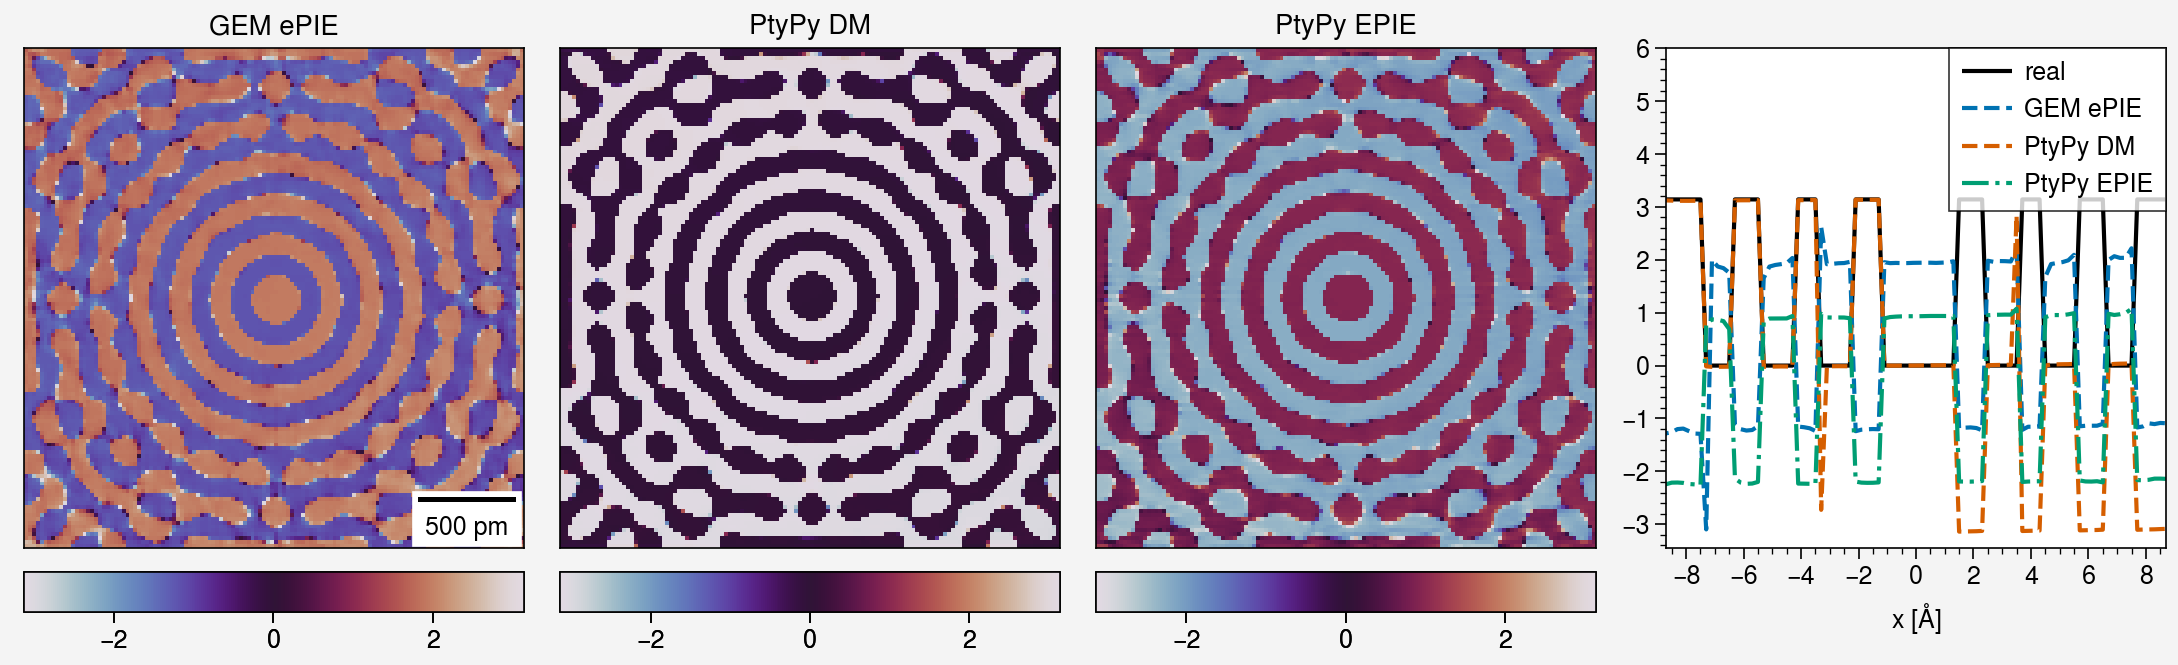

In [5]:
fig, (ax1, ax2, ax3, axpf) = pplt.subplots(
    nrows=1, ncols=4,
    xticks=[], yticks=[],
    share=False)
X = np.arange(GEM_phs.shape[1]) * 0.19998036801729185 # angstrom
X -= X.mean()

margin = 4 # angstrom
m = ax1.imshow(GEM_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax1.add_artist(ScaleBar(0.1, 'nm', location='lower right'))
ax1.colorbar(m, loc="b")
m = ax2.imshow(DM_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax2.colorbar(m, loc="b")
m = ax3.imshow(EPIE_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax3.colorbar(m, loc="b")

ax1.format(title='GEM ePIE')
ax2.format(title='PtyPy DM')
ax3.format(title='PtyPy EPIE')

axpf.plot(X, origin_phs[origin_phs.shape[0]//2], label='real', linestyle='-', color='black')
axpf.plot(X, GEM_phs[GEM_phs.shape[0]//2], label='GEM ePIE', linestyle='--')
axpf.plot(X, DM_phs[DM_phs.shape[0]//2], label='PtyPy DM', linestyle='--')
axpf.plot(X, EPIE_phs[EPIE_phs.shape[0]//2], label='PtyPy EPIE', linestyle='-.')
axpf.legend(ncols=1, loc='upper right')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(None, 6), xticks=2, yticks=1, xlabel='x [$\AA$]')

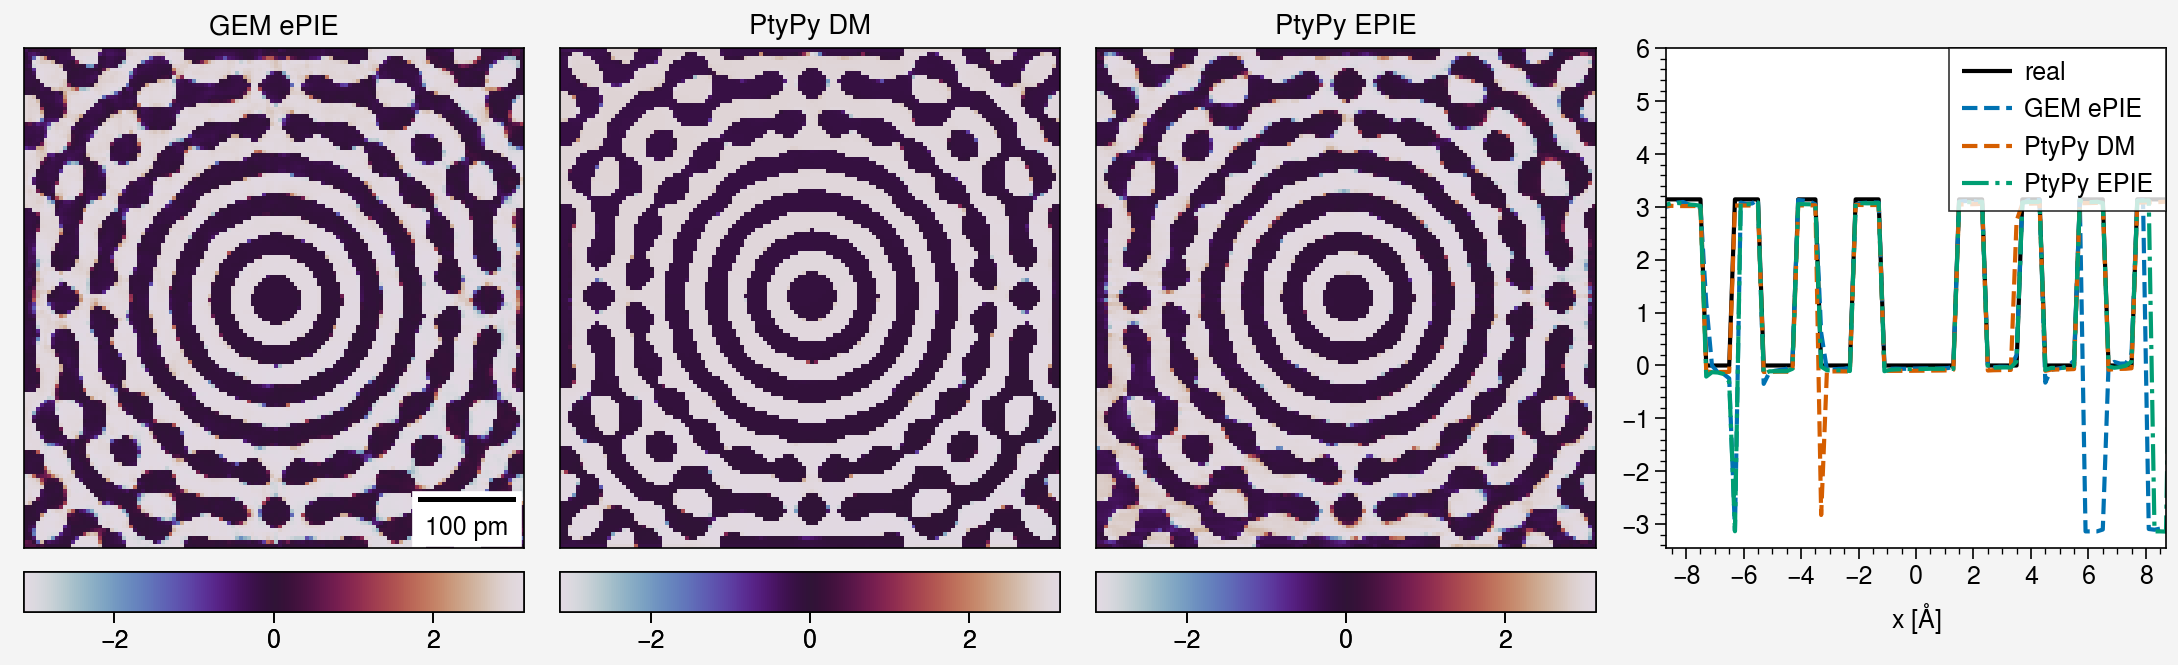

In [6]:
from skimage.restoration import unwrap_phase
def unwrap_phase(phase):
    return phase

fig, (ax1, ax2, ax3, axpf) = pplt.subplots(
    nrows=1, ncols=4,
    xticks=[], yticks=[],
    share=False)
X = np.arange(GEM_phs.shape[1]) * 0.19998036801729185 # angstrom
X -= X.mean()

origin = np.load("../probe_wf.npy")
origin_int = np.abs(origin)**2; origin_int /= origin_int.max()
origin_phs = unwrap_phase(np.angle(origin))
GEM = np.load(r'task_SimpleSimScikit_ePIE_padding_1\final_probe_rot.npy') * np.exp(-1j * 2)
GEM_int = np.abs(GEM)**2; GEM_int /= GEM_int.max()
GEM_phs = unwrap_phase(np.angle(GEM))
DM = np.load(r'task_SimpleSimScikit_PtyPy_DM_padding_1_full_support\final_probe_rot_0100.npy') * np.exp(-1j * 0.1)
DM_int = np.abs(DM)**2; DM_int /= DM_int.max()
DM_phs = unwrap_phase(np.angle(DM))
EPIE = np.load(r'task_SimpleSimScikit_PtyPy_EPIE_200_padding_1\final_probe_rot_0200.npy') * np.exp(-1j * 1)
EPIE_int = np.abs(EPIE)**2; EPIE_int /= EPIE_int.max()
EPIE_phs = unwrap_phase(np.angle(EPIE))

margin = 4 # angstrom
m = ax1.imshow(GEM_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax1.add_artist(ScaleBar(0.19998036801729185e-1, 'nm', location='lower right'))
ax1.colorbar(m, loc="b")
m = ax2.imshow(DM_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax2.colorbar(m, loc="b")
m = ax3.imshow(EPIE_phs, extent=[X[0], X[-1], X[0], X[-1]], cmap="twilight")
ax3.colorbar(m, loc="b")

ax1.format(title='GEM ePIE')
ax2.format(title='PtyPy DM')
ax3.format(title='PtyPy EPIE')

axpf.plot(X, origin_phs[origin_phs.shape[0]//2], label='real', linestyle='-', color='black')
axpf.plot(X, GEM_phs[GEM_phs.shape[0]//2], label='GEM ePIE', linestyle='--')
axpf.plot(X, DM_phs[DM_phs.shape[0]//2], label='PtyPy DM', linestyle='--')
axpf.plot(X, EPIE_phs[EPIE_phs.shape[0]//2], label='PtyPy EPIE', linestyle='-.')
axpf.legend(ncols=1, loc='upper right')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(None, 6), xticks=2, yticks=1, xlabel='x [$\AA$]')

## Agregate

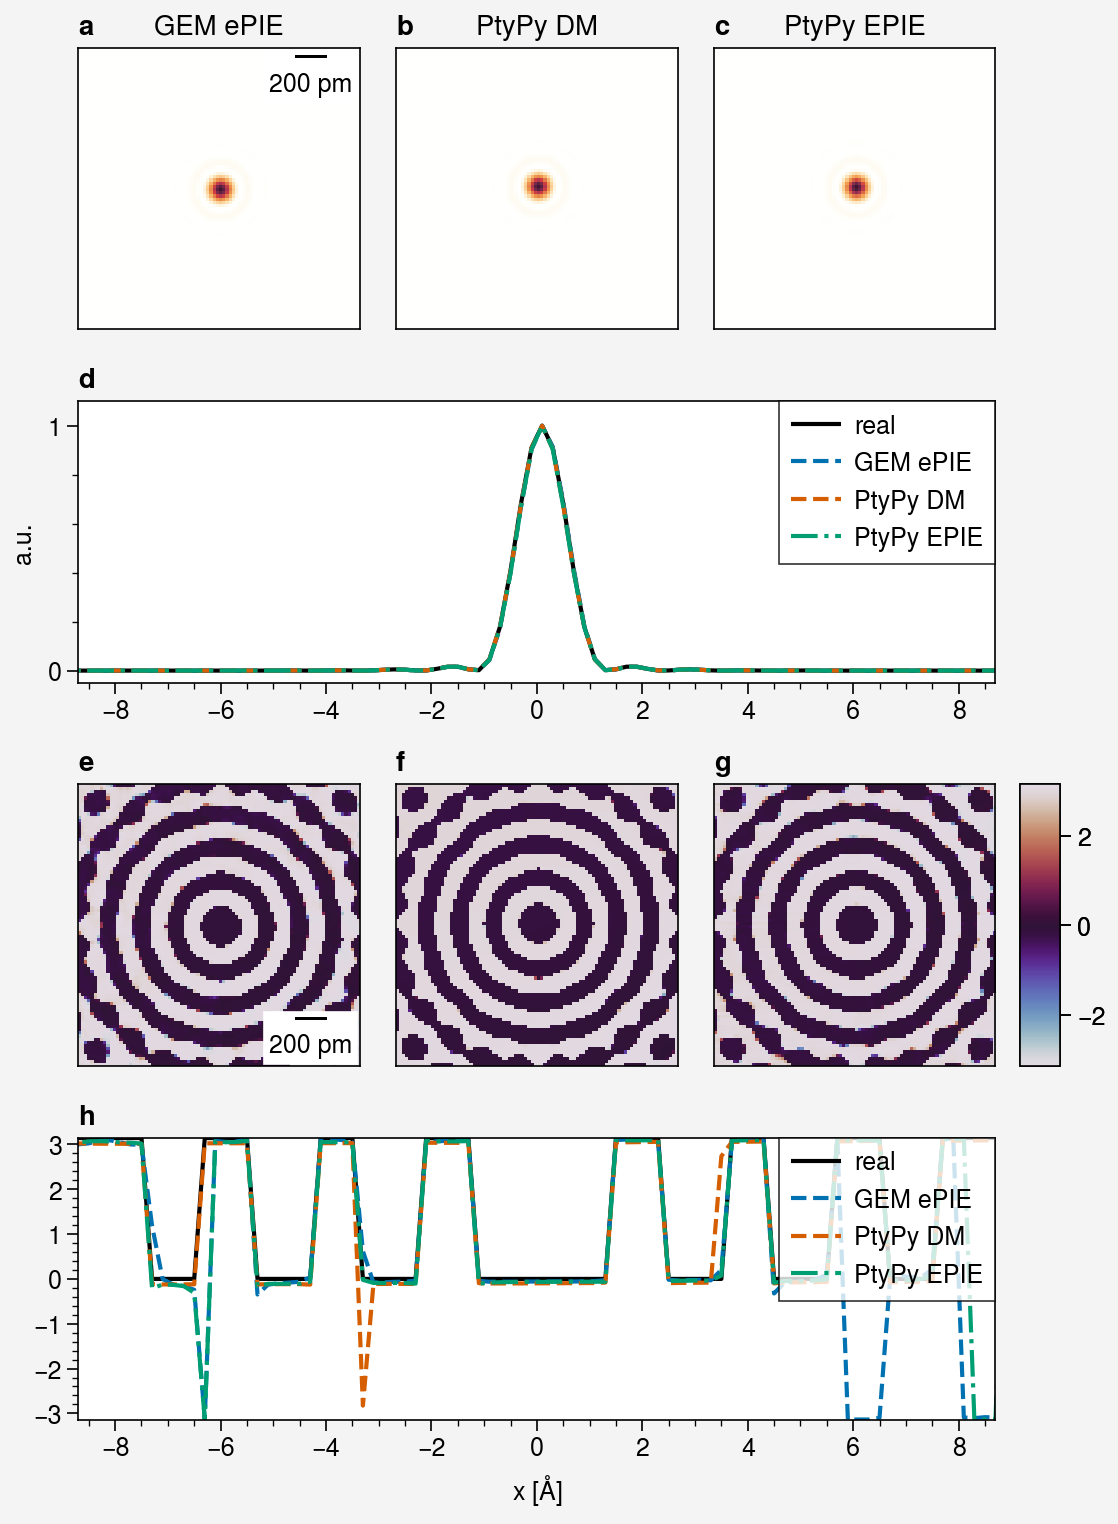

In [7]:
fig, axs = pplt.subplots(
    figwidth="14.2cm",
    xticks=[], yticks=[],
    array=[[1, 2, 3], [4, 4, 4], [5, 6, 7], [8, 8, 8]],
    share=False,
    abc=True)

(ax1, ax2, ax3, axpf, ax1p, ax2p, ax3p, axpfp) = axs
X = np.arange(GEM_int.shape[1]) * 0.19998036801729185 # angstrom
X -= X.mean()

margin = 4 # angstrom
ax1.imshow(GEM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax1.add_artist(ScaleBar(0.1, 'nm', location='upper right'))
ax2.imshow(DM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax3.imshow(EPIE_int, extent=[X[0], X[-1], X[0], X[-1]])

ax1.format(title='GEM ePIE')
ax1.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax2.format(title='PtyPy DM')
ax2.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax3.format(title='PtyPy EPIE')
ax3.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))

axpf.plot(X, origin_int[origin_int.shape[0]//2], label='real', linestyle='-', color='black')
axpf.plot(X, GEM_int[GEM_int.shape[0]//2], label='GEM ePIE', linestyle='--')
axpf.plot(X, DM_int[DM_int.shape[0]//2-1], label='PtyPy DM', linestyle='--')
axpf.plot(X, EPIE_int[EPIE_int.shape[0]//2-1], label='PtyPy EPIE', linestyle='-.')
axpf.legend(ncols=1, loc='upper right')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(None, 1.1), xticks=2, yticks=1, ylabel="a.u.")

origin = np.load("../probe_wf.npy")
origin_int = np.abs(origin)**2; origin_int /= origin_int.max()
origin_phs = unwrap_phase(np.angle(origin))
GEM = np.load(r'task_SimpleSimScikit_ePIE_padding_1\final_probe_rot.npy') * np.exp(-1j * 2)
GEM_int = np.abs(GEM)**2; GEM_int /= GEM_int.max()
GEM_phs = unwrap_phase(np.angle(GEM))
DM = np.load(r'task_SimpleSimScikit_PtyPy_DM_padding_1_full_support\final_probe_rot_0100.npy') * np.exp(-1j * 0.1)
DM_int = np.abs(DM)**2; DM_int /= DM_int.max()
DM_phs = unwrap_phase(np.angle(DM))
EPIE = np.load(r'task_SimpleSimScikit_PtyPy_EPIE_200_padding_1\final_probe_rot_0200.npy') * np.exp(-1j * 1)
EPIE_int = np.abs(EPIE)**2; EPIE_int /= EPIE_int.max()
EPIE_phs = unwrap_phase(np.angle(EPIE))

m = ax1p.imshow(GEM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax1p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax1p.add_artist(ScaleBar(0.1, 'nm', location='lower right'))
# ax1p.colorbar(m, loc="b")
m = ax2p.imshow(DM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax2p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
# ax2p.colorbar(m, loc="b")
m = ax3p.imshow(EPIE_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax3p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
# ax3p.colorbar(m, loc="b")
fig.colorbar(m, loc="r", rows=3)

axpfp.plot(X, origin_phs[origin_phs.shape[0]//2], label='real', linestyle='-', color='black')
axpfp.plot(X, GEM_phs[GEM_phs.shape[0]//2], label='GEM ePIE', linestyle='--')
axpfp.plot(X, DM_phs[DM_phs.shape[0]//2], label='PtyPy DM', linestyle='--')
axpfp.plot(X, EPIE_phs[EPIE_phs.shape[0]//2], label='PtyPy EPIE', linestyle='-.')
axpfp.legend(ncols=1, loc='upper right')
axpfp.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(-np.pi, np.pi), xticks=2, yticks=1, xlabel='x [$\AA$]')

plt.savefig('probe_comparison.pdf', dpi=300)

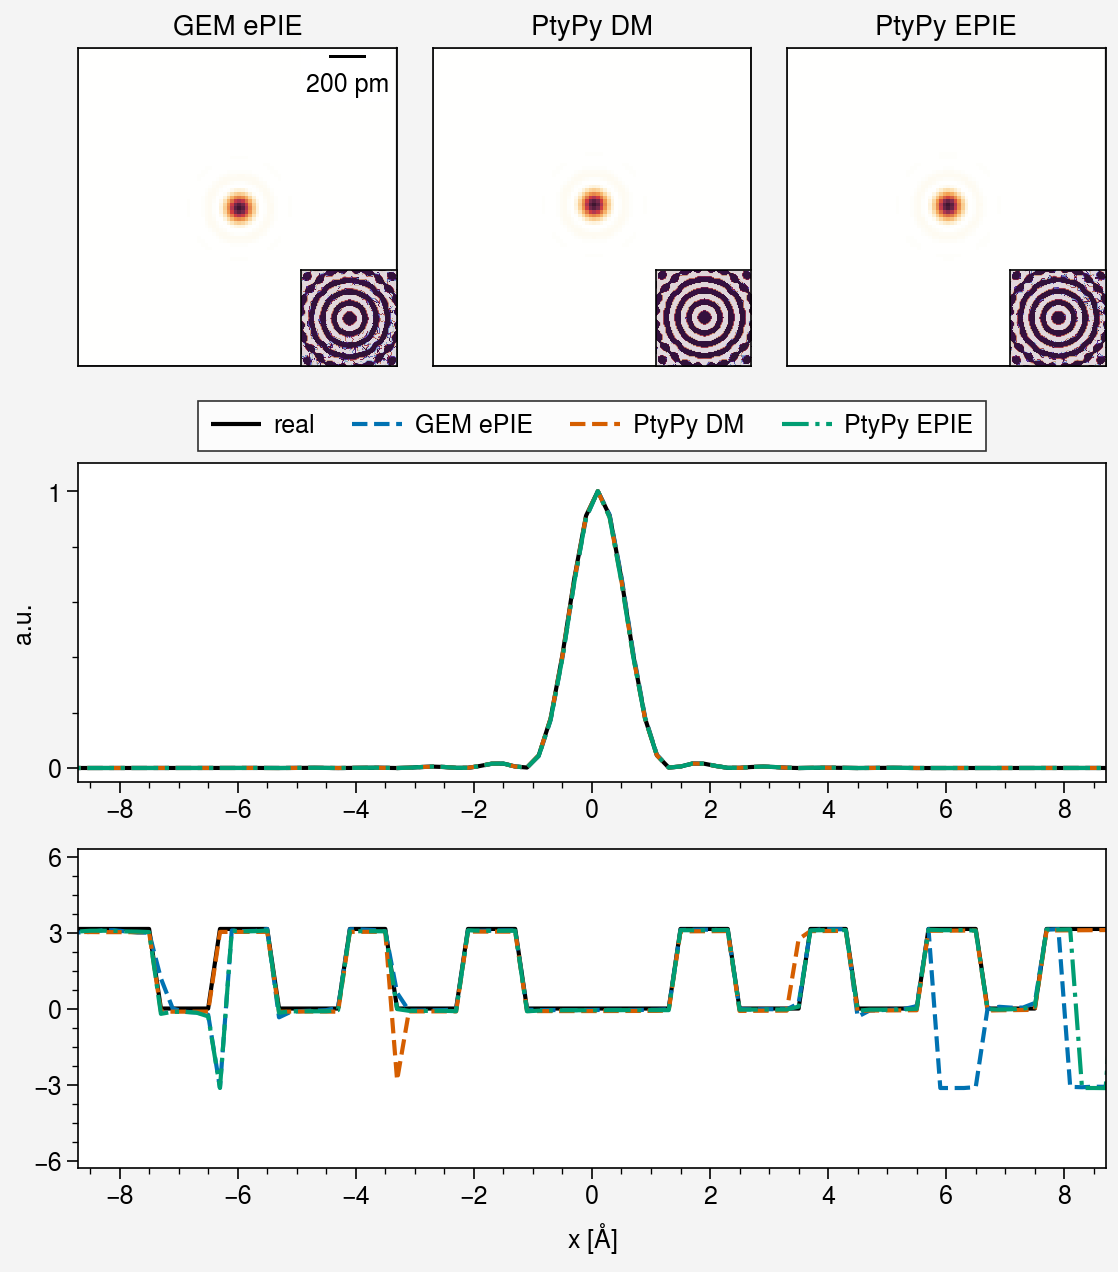

In [8]:
fig, axs = pplt.subplots(
    figwidth="14.2cm",
    xticks=[], yticks=[],
    array=[[1, 2, 3],
           [4, 4, 4],
        #    [5, 6, 7],
           [8, 8, 8]],
    share=False)

# (ax1, ax2, ax3, axpf, ax1p, ax2p, ax3p, axpfp) = axs
(ax1, ax2, ax3, axpf, axpfp) = axs
X = np.arange(GEM_int.shape[1]) * 0.19998036801729185 # angstrom
X -= X.mean()

margin = 4 # angstrom
ax1.imshow(GEM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax1.add_artist(ScaleBar(0.1, 'nm', location='upper right'))
ax2.imshow(DM_int, extent=[X[0], X[-1], X[0], X[-1]])
ax3.imshow(EPIE_int, extent=[X[0], X[-1], X[0], X[-1]])

ax1.format(title='GEM ePIE')
ax1.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax2.format(title='PtyPy DM')
ax2.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
ax3.format(title='PtyPy EPIE')
ax3.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))

axpf.plot(X, origin_int[origin_int.shape[0]//2], label='real', linestyle='-', color='black')
axpf.plot(X, GEM_int[GEM_int.shape[0]//2], label='GEM ePIE', linestyle='--')
axpf.plot(X, DM_int[DM_int.shape[0]//2-1], label='PtyPy DM', linestyle='--')
axpf.plot(X, EPIE_int[EPIE_int.shape[0]//2-1], label='PtyPy EPIE', linestyle='-.')
axpf.legend(ncols=4, loc='t')
axpf.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(None, 1.1), xticks=2, yticks=1, ylabel="a.u.")

origin = np.load("../probe_wf.npy")
origin_int = np.abs(origin)**2; origin_int /= origin_int.max()
origin_phs = unwrap_phase(np.angle(origin))
GEM = np.load(r'task_SimpleSimScikit_ePIE_padding_1\final_probe_rot.npy') * np.exp(-1j * 2)
GEM_int = np.abs(GEM)**2; GEM_int /= GEM_int.max()
GEM_phs = unwrap_phase(np.angle(GEM))
DM = np.load(r'task_SimpleSimScikit_PtyPy_DM_padding_1_full_support\final_probe_rot_0100.npy') * np.exp(-1j * 0.1)
DM_int = np.abs(DM)**2; DM_int /= DM_int.max()
DM_phs = unwrap_phase(np.angle(DM))
EPIE = np.load(r'task_SimpleSimScikit_PtyPy_EPIE_200_padding_1\final_probe_rot_0200.npy') * np.exp(-1j * 1)
EPIE_int = np.abs(EPIE)**2; EPIE_int /= EPIE_int.max()
EPIE_phs = unwrap_phase(np.angle(EPIE))

ax1p = ax1.inset([0.7, 0, 0.3, 0.3])
ax1p.format(xticks=[], yticks=[])
m = ax1p.imshow(GEM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax1p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
# ax1p.add_artist(ScaleBar(0.1, 'nm', location='lower right'))
# ax1p.colorbar(m, loc="b")

ax2p = ax2.inset([0.7, 0, 0.3, 0.3])
ax2p.format(xticks=[], yticks=[])
m = ax2p.imshow(DM_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax2p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
# ax2p.colorbar(m, loc="b")

ax3p = ax3.inset([0.7, 0, 0.3, 0.3])
ax3p.format(xticks=[], yticks=[])
m = ax3p.imshow(EPIE_phs, extent=[X[0], X[-1], X[0], X[-1]], vmin=-np.pi, vmax=np.pi, cmap="twilight")
ax3p.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(X[0]+margin, X[-1]-margin))
# ax3p.colorbar(m, loc="b")
# fig.colorbar(m, loc="r", rows=3)

axpfp.plot(X, origin_phs[origin_phs.shape[0]//2], linestyle='-', color='black')
axpfp.plot(X, GEM_phs[GEM_phs.shape[0]//2], linestyle='--')
axpfp.plot(X, DM_phs[DM_phs.shape[0]//2], linestyle='--')
axpfp.plot(X, EPIE_phs[EPIE_phs.shape[0]//2], linestyle='-.')
# axpfp.legend(ncols=1, loc='upper right')
axpfp.format(xlim=(X[0]+margin, X[-1]-margin), ylim=(-2*np.pi, 2*np.pi), xticks=2, yticks=3, xlabel='x [$\AA$]')

plt.savefig('probe_comparison.pdf', dpi=300)